In [2]:
using Random, Distributions
using Plots
gr() # Plots.GRBackend()

┌ Info: Precompiling Distributions [31c24e10-a181-5473-b8eb-7969acd0382f]
└ @ Base loading.jl:1192


Plots.GRBackend()

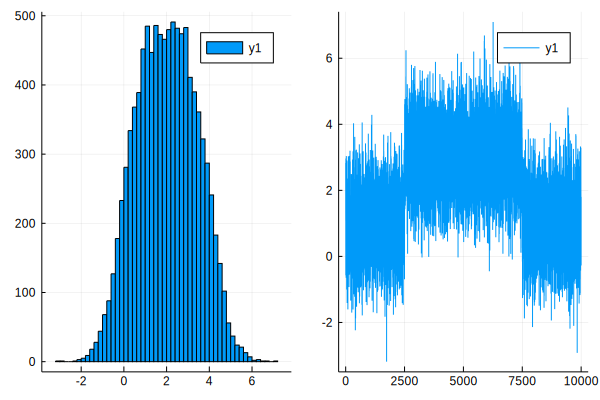

In [3]:
N = 10000

T = Int(N/2)

m_noise = 1.
noise = rand(Normal(m_noise, 1.), 2*T)
ref_noise = rand(Normal(m_noise, 1.), 2*T)

m_sig = 2.

d = .5
D = Int(d*T)

sig = zeros(D)
sig = vcat(sig, m_sig*ones(T, 1))
sig = vcat(sig, zeros(T-D))

x = sig + noise

p1 = histogram(x, nbin=75)
p2 = plot(x)
l = @layout [a b]
plot(p1, p2, layout = l)

In [4]:
A=x[1:T]
B=x[T+1:N]

5000-element Array{Float64,1}:
  3.201291075392659  
  3.5442277511892257 
  3.3975787084319364 
  1.5230528202654863 
  4.076153309428241  
  3.838142050495088  
  2.7762933179257203 
  2.8879848253786413 
  1.4169569120846162 
  3.057320940803045  
  3.5066793364609814 
  0.43446570509202465
  1.897411430133049  
  ⋮                  
  3.2897449409951123 
  2.1824489920365    
  1.5067815370753537 
  0.32525384621542963
  0.1068552687751646 
  0.4938898614322249 
  0.7454131168244424 
  0.42421913929560595
  1.761635927702327  
  0.6026421459758793 
 -0.2754651951896341 
  1.8028550364273264 

In [5]:
ratio(a, b) = b/(a+b)

ratio (generic function with 1 method)

In [6]:
ζ = ratio(mean(A)-mean(noise), mean(B)-mean(noise))
println(ζ)
e = ζ - d

0.5052581721056082


0.005258172105608194

In [7]:
ζ = ratio(sum(A)-sum(ref_noise[1:T]), sum(B)-sum(ref_noise[T+1:N]))
println(ζ)
e = ζ - d

0.5056334045654258


0.005633404565425826

In [8]:
sum(A), sum(B)

(9967.53872848702, 10072.702170599185)

In [9]:
function algo(τ, d, s, mnoise)
    # the speed of light
    c = 299792458
    # τ = 1.5e-6

    # D = .5cΔ = .5cζτ

    N = 10000
    T = Int(N/2)

    ratio(a, b) = b/(a+b)
    cmos_model(x) = .2*x + 1.0*sqrt(x) + 0.0
    # cmos_model(x) = x

    noise = rand(Normal(mnoise, 1.), 2*T)
    ref_noise = rand(Normal(mnoise, 1.), 2*T)

    # -------_______
    # 
    # ____------____
    #
    #     ^

    # d = ct/2
    # t = 2d/c
    # D = Int(floor(d*T))
    D = Int(floor(2*d/c/τ*T))

    sig = zeros(D)
    sig = vcat(sig, s*ones(T, 1))
    sig = vcat(sig, zeros(T-D))

    x = sig + noise

    # A = (x[1:T])
    # B = (x[T+1:N])
    A = cmos_model(sum(x[1:T]))
    B = cmos_model(sum(x[T+1:N]))
    nA = cmos_model(sum(ref_noise[1:T]))
    nB = cmos_model(sum(ref_noise[T+1:N]))

    # ζ = ratio(mean(A)-mean(noise), mean(B)-mean(noise))
    # ζ = ratio(sA-sum(ref_noise[1:T]), sB-sum(ref_noise[T+1:N]))
    ζ = ratio(A-nA, B-nB)
    d = .5c*ζ*τ
end

algo (generic function with 1 method)

In [10]:
N = 10000
T = Int(N/2)
c = 299792458
τ = 1.5e-6
println(c*τ/2)
d=150
t = 2*d/c
println(t)
t/τ*T

224.8443435
1.000692285594456e-6


3335.64095198152

In [11]:
algo(1.5e-6, 5, 1,1)

2.3656827732135532

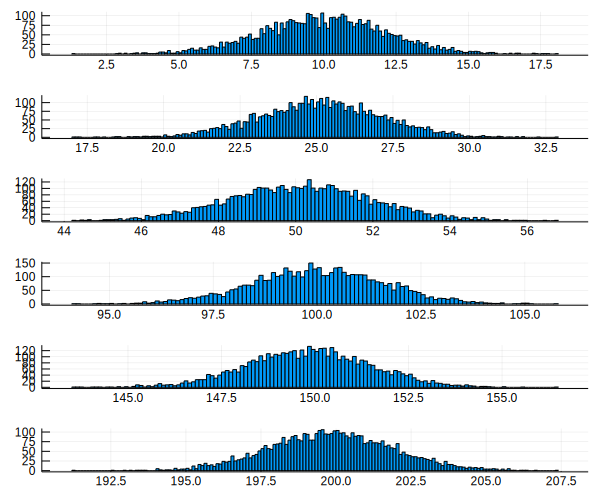

In [12]:
e = [[algo(1.5e-6,d,2.,1.) for n=1:5000] for d in [10.,25.,50.,100.,150.,200.]]
histogram(e, nbin=200, layout = (6,1), legend = false, size=(600,500))

In [13]:
e = [[algo(.75e-6,d,3,1) for n=1:10000] for d in [10.,25.,50.,100.]]

4-element Array{Array{Float64,1},1}:
 [10.8169, 8.97672, 9.40911, 10.0153, 9.90727, 9.81299, 11.5238, 10.0848, 8.65077, 9.66431  …  9.656, 9.85315, 11.4081, 11.0894, 9.59258, 10.0117, 11.1822, 9.93672, 9.28571, 9.93216]
 [25.6392, 25.3899, 25.1877, 25.2952, 24.6946, 24.605, 26.1506, 26.4035, 25.366, 25.6289  …  24.7005, 26.4257, 24.2921, 23.938, 24.114, 25.1332, 25.6378, 24.7244, 24.8006, 23.8551]  
 [50.2437, 49.7007, 49.6915, 50.4201, 49.2864, 50.9582, 50.957, 49.4815, 50.7158, 49.6624  …  50.4565, 50.3812, 49.7268, 50.002, 48.3262, 50.562, 50.364, 48.9714, 50.5681, 50.0361]  
 [98.871, 100.013, 99.3177, 100.161, 100.248, 99.9734, 100.263, 99.485, 99.5691, 100.685  …  99.6698, 99.3372, 99.3566, 98.9096, 99.8573, 98.5237, 100.574, 99.7576, 99.4449, 99.4382]

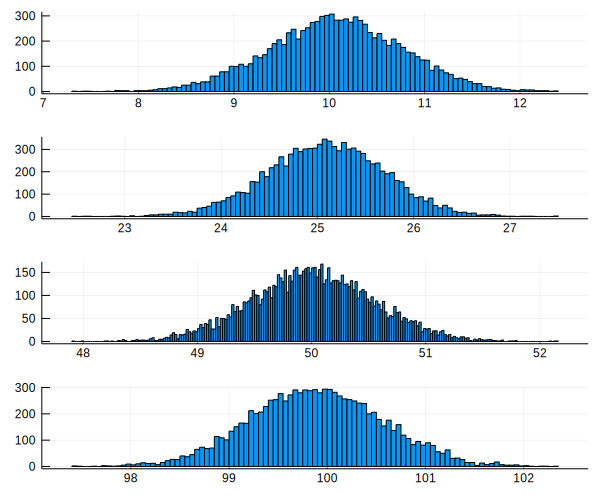

In [14]:
histogram(e, nbin=200, layout = (4,1), legend = false, size=(600,500))

In [15]:
e = [[algo(1.5e-6,d,3,1) for n=1:10000] for d in [10.,25.,50.,100.,150.,200.]]

6-element Array{Array{Float64,1},1}:
 [10.0418, 9.45145, 10.1563, 10.5713, 9.17795, 8.70017, 9.48154, 8.76742, 10.8559, 9.29612  …  12.2738, 13.594, 11.5022, 12.2265, 9.53084, 8.9144, 11.9464, 10.0493, 9.87335, 10.4105]  
 [25.4886, 26.4797, 27.3885, 28.0309, 24.516, 21.9007, 28.5333, 24.8915, 25.9888, 26.3713  …  24.3654, 23.3195, 26.2875, 24.8252, 25.852, 26.2466, 24.1885, 24.7186, 26.4686, 26.2084]  
 [50.8441, 48.1722, 50.3924, 49.2569, 51.1895, 49.2814, 49.4957, 49.8094, 48.7868, 51.8155  …  49.1677, 50.1207, 49.7128, 49.6359, 50.8347, 49.9305, 50.1973, 49.4042, 49.8985, 48.9603]
 [99.3537, 99.6171, 99.5695, 100.523, 100.167, 100.74, 100.682, 100.012, 101.357, 99.7029  …  101.084, 98.0886, 100.628, 101.501, 99.4951, 100.968, 99.3995, 99.8102, 99.7976, 100.979] 
 [149.339, 149.242, 149.06, 150.998, 148.281, 147.802, 149.1, 150.647, 149.021, 150.141  …  150.31, 150.502, 150.67, 149.011, 148.586, 149.002, 148.252, 150.486, 149.29, 148.727]      
 [199.269, 199.831, 198.051, 198.833, 

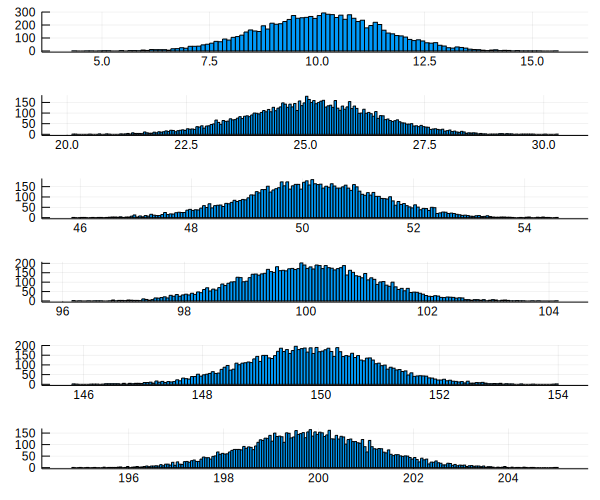

In [16]:
histogram(e, nbin=200, layout = (6,1), legend = false, size=(600,500))

In [ ]:
# boxplot is defined in StatsPlots
using StatsPlots
gr(leg=false, bg=:lightgrey)

# Create a filled contour and boxplot side by side.
plot(contourf(randn(10,20)), boxplot(rand(1:4,1000),randn(1000)))

# Add a histogram inset on the heatmap.
# We set the (optional) position relative to bottom-right of the 1st subplot.
# The call is `bbox(x, y, width, height, origin...)`, where numbers are treated as "percent of parent"
histogram!(randn(1000), inset = (1, bbox(0.05,0.05,0.5,0.25,:bottom,:right)), ticks=nothing, subplot=3, bg_inside=nothing)

# Add sticks floating in the window (inset relative to the window, as opposed to being relative to a subplot)
sticks!(randn(100), inset = bbox(0,-0.2,200px,100px,:center), ticks=nothing, subplot=4)

┌ Info: Precompiling StatsPlots [f3b207a7-027a-5e70-b257-86293d7955fd]
└ @ Base loading.jl:1192


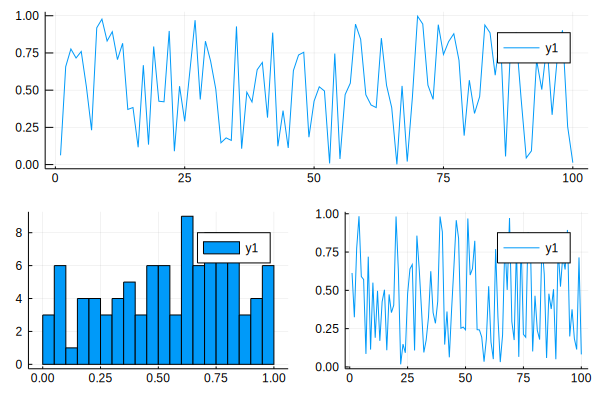

In [18]:
gr()
l = @layout [a ; b c]
p1 = plot(rand(100))
p2 = histogram(rand(100), nbin=20)
p3 = plot(rand(100))
plot(p1, p2, p3, layout = l)